In [2]:
# read MNIST training data
import pandas as pd
import torch
def LoadData(path):
    df = pd.read_csv(path)
    X = df.iloc[:, 1:].to_numpy() / 255.0       # values are scaled to be between 0 and 1
    y = df.iloc[:, 0].to_numpy()                # labels of images
    X=torch.tensor(X)
    X=X.float()
    y=torch.tensor(y)

    return X,y

In [3]:
path='./data/mnist_train.csv'
data, labels = LoadData(path)
testpath='./data/mnist_test.csv'
X, y = LoadData(path)
X_test, y_test = LoadData(testpath)
print(X.dtype)
from torch.utils.data import Dataset, TensorDataset, DataLoader
train_dataset = TensorDataset(X, y)
train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)

torch.float32


In [4]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# Define a custom autoencoder model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 100),
            nn.SELU(),
            nn.Linear(100, 30),
            nn.SELU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(30, 100),
            nn.SELU(),
            nn.Linear(100, 784),
            nn.Sigmoid()  # Using sigmoid for the output layer
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Initialize the autoencoder model
autoencoder = Autoencoder()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.001)


# Training loop
num_epochs = 10
train_losses = []
for epoch in range(num_epochs):
    for data in train_loader:
        images, _ = data
        images = images.view(images.size(0), -1)  # Flatten the images
        optimizer.zero_grad()
        outputs = autoencoder(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')
    train_losses.append(loss.item())
# Save the trained model
torch.save(autoencoder.state_dict(), 'autoencoder_model.pth')


Epoch [1/10], Loss: 0.0498
Epoch [2/10], Loss: 0.0370
Epoch [3/10], Loss: 0.0281
Epoch [4/10], Loss: 0.0242
Epoch [5/10], Loss: 0.0226
Epoch [6/10], Loss: 0.0207
Epoch [7/10], Loss: 0.0205
Epoch [8/10], Loss: 0.0175
Epoch [9/10], Loss: 0.0175
Epoch [10/10], Loss: 0.0144


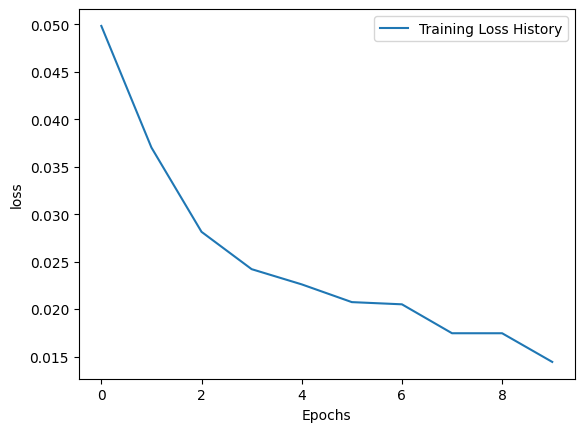

In [5]:
import matplotlib.pyplot as plt
def plotLossHistory(train_losses):
    plt.figure()
    plt.plot(range(len(train_losses)), train_losses, label='Training Loss History')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.legend()
plotLossHistory(train_losses)

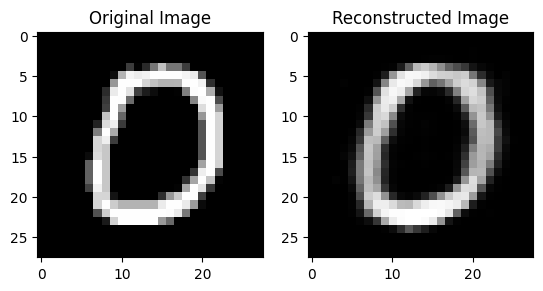

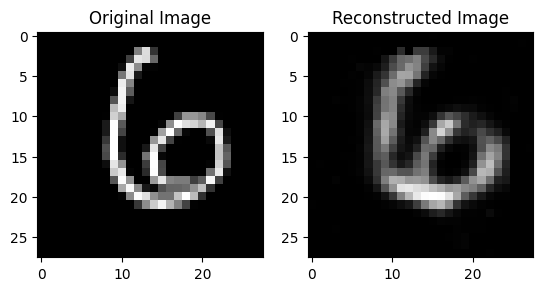

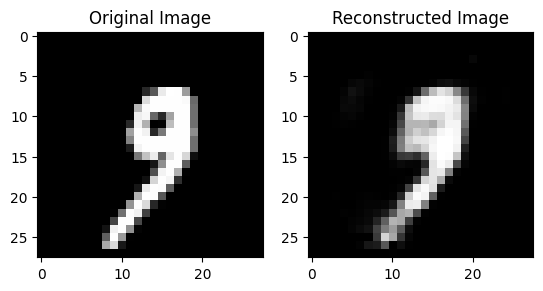

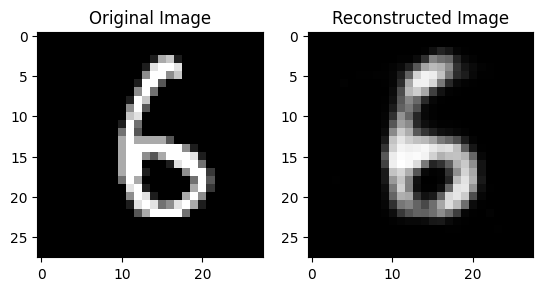

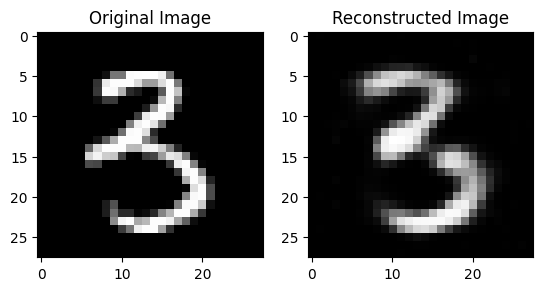

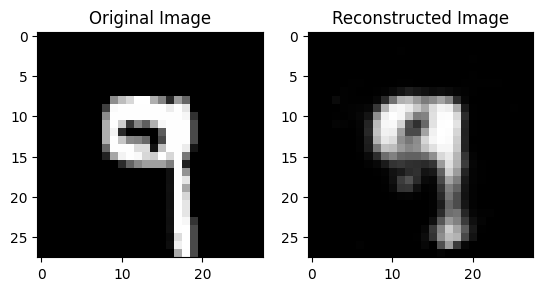

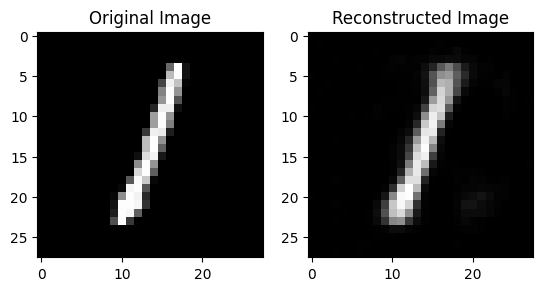

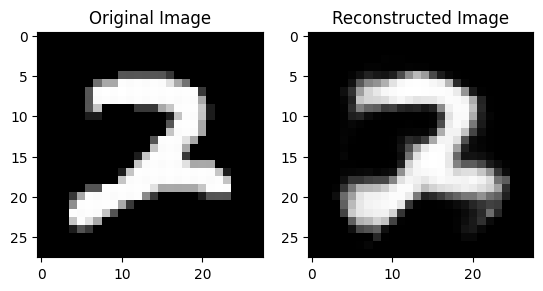

In [6]:
import torch
import torchvision
import matplotlib.pyplot as plt
import random

# Load the MNIST dataset for testing

# Load the trained autoencoder model
autoencoder.load_state_dict(torch.load('autoencoder_model.pth'))
autoencoder.eval()

# Randomly choose a few examples for reconstruction
num_examples = 8
examples = [10,100,1000,3000,5000,6000,7000,9500]

# Reconstruct and display the chosen examples
with torch.no_grad():
    for example_idx in examples:
        original_image, _ = test_dataset[example_idx]
        original_image = original_image.view(1, -1)
        reconstructed_image = autoencoder(original_image)

        # Reshape the reconstructed image to its original shape (e.g., 28x28)
        reconstructed_image = reconstructed_image.view(28, 28)

        plt.figure()
        plt.subplot(1, 2, 1)
        plt.title('Original Image')
        plt.imshow(original_image.view(28, 28).numpy(), cmap='gray')

        plt.subplot(1, 2, 2)
        plt.title('Reconstructed Image')
        plt.imshow(reconstructed_image.numpy(), cmap='gray')

        plt.show()
